In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(torch.__version__)
print(np.__version__)
print(torchvision.__version__)

1.8.1+cu101
1.19.5
0.9.1+cu101


In [2]:
dataset = MNIST(root='data/', download=True)

In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [4]:
len(dataset)

60000

In [5]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FBD82BE5890>, 5)

Label:  5


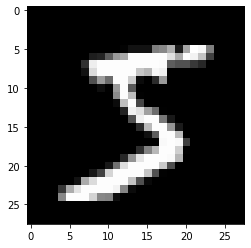

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label: ', label)

Label:  3


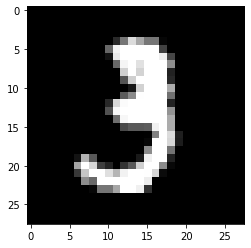

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label: ', label)

In [9]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [10]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [11]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


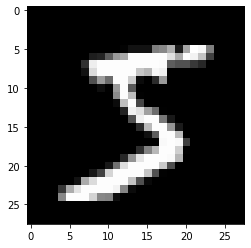

In [12]:
plt.imshow(img_tensor[0,:,:], cmap='gray')

In [13]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [14]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [15]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [16]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0259, -0.0111,  0.0180,  ...,  0.0244, -0.0223,  0.0243],
        [-0.0133,  0.0314, -0.0159,  ..., -0.0139,  0.0278,  0.0190],
        [-0.0276, -0.0052,  0.0307,  ...,  0.0305,  0.0244,  0.0039],
        ...,
        [ 0.0256,  0.0016,  0.0230,  ..., -0.0181,  0.0179,  0.0183],
        [-0.0050,  0.0028, -0.0216,  ..., -0.0294,  0.0038,  0.0051],
        [ 0.0289, -0.0298, -0.0006,  ...,  0.0180, -0.0026,  0.0058]],
       requires_grad=True)

In [17]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0216, -0.0015, -0.0060, -0.0163,  0.0299,  0.0243, -0.0011, -0.0317,
         0.0308,  0.0272], requires_grad=True)

In [18]:
for images, label in train_loader:
    print(label)
    print(images.shape)
    outputs = model(images.reshape(128, 784))
    break

tensor([1, 9, 9, 9, 4, 8, 7, 9, 0, 7, 1, 5, 8, 4, 6, 5, 2, 6, 1, 9, 9, 8, 1, 4,
        9, 2, 2, 6, 6, 0, 0, 5, 4, 6, 8, 4, 3, 6, 1, 2, 2, 7, 7, 6, 5, 8, 6, 5,
        6, 0, 1, 0, 6, 2, 5, 6, 1, 0, 4, 5, 1, 2, 7, 6, 7, 1, 9, 3, 3, 2, 9, 5,
        8, 6, 5, 7, 2, 0, 3, 7, 6, 3, 7, 1, 8, 6, 8, 6, 5, 1, 4, 7, 8, 7, 7, 1,
        7, 2, 6, 1, 6, 6, 3, 6, 4, 2, 8, 1, 3, 6, 6, 9, 0, 1, 4, 4, 1, 0, 8, 3,
        3, 4, 6, 3, 3, 0, 0, 4])
torch.Size([128, 1, 28, 28])


In [19]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(128, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [20]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [21]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0155,  0.0235, -0.0064,  ...,  0.0331, -0.0278, -0.0351],
         [-0.0225, -0.0074,  0.0117,  ...,  0.0090, -0.0290, -0.0349],
         [-0.0106, -0.0172,  0.0020,  ..., -0.0026, -0.0180,  0.0079],
         ...,
         [ 0.0097, -0.0252, -0.0343,  ..., -0.0069,  0.0111,  0.0283],
         [-0.0158,  0.0029, -0.0159,  ..., -0.0346, -0.0056,  0.0231],
         [ 0.0327,  0.0134, -0.0080,  ..., -0.0093, -0.0256,  0.0232]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0167,  0.0341, -0.0175,  0.0251, -0.0160, -0.0353, -0.0074,  0.0091,
         -0.0123,  0.0270], requires_grad=True)]

In [22]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape: ', outputs.shape)
print('sample output: ', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape:  torch.Size([128, 10])
sample output:  tensor([[-0.0513,  0.0540, -0.1328,  0.1277, -0.2254,  0.0028, -0.2374, -0.0020,
          0.0139, -0.2066],
        [-0.1117,  0.1087, -0.1637, -0.1000, -0.0821, -0.2017, -0.2805,  0.3194,
          0.1059, -0.3406]])


In [23]:
import torch.nn.functional as F

In [24]:
probs = F.softmax(outputs, dim=1)

print("Sample probablities: \n", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

Sample probablities: 
 tensor([[0.1007, 0.1119, 0.0928, 0.1205, 0.0846, 0.1063, 0.0836, 0.1058, 0.1075,
         0.0862],
        [0.0946, 0.1179, 0.0898, 0.0957, 0.0974, 0.0864, 0.0799, 0.1455, 0.1176,
         0.0752]])
Sum:  1.0


In [25]:
max_probs, preds = torch.max(probs, dim=1)

print(preds)
print(max_probs)

tensor([3, 7, 6, 8, 0, 3, 5, 8, 3, 0, 3, 7, 3, 1, 4, 5, 0, 8, 1, 8, 8, 3, 1, 1,
        1, 6, 7, 5, 3, 8, 3, 1, 8, 7, 1, 8, 7, 1, 1, 8, 1, 3, 7, 5, 8, 3, 1, 8,
        1, 3, 3, 3, 8, 7, 3, 8, 3, 3, 3, 3, 8, 8, 3, 3, 3, 3, 2, 5, 7, 3, 5, 3,
        3, 4, 1, 3, 4, 1, 0, 3, 3, 1, 1, 1, 3, 8, 8, 3, 3, 3, 3, 3, 4, 3, 8, 0,
        5, 3, 3, 5, 8, 1, 8, 3, 1, 3, 0, 7, 1, 8, 7, 8, 1, 4, 0, 1, 8, 8, 1, 1,
        7, 9, 3, 1, 1, 3, 1, 3])
tensor([0.1205, 0.1455, 0.1190, 0.1465, 0.1211, 0.1396, 0.1388, 0.1103, 0.1250,
        0.1270, 0.1180, 0.1563, 0.1306, 0.1276, 0.1260, 0.1433, 0.1309, 0.1339,
        0.1171, 0.1511, 0.1370, 0.1596, 0.1322, 0.1374, 0.1198, 0.1203, 0.1485,
        0.1196, 0.1191, 0.1281, 0.1315, 0.1164, 0.1207, 0.1211, 0.1221, 0.1418,
        0.1352, 0.1429, 0.1331, 0.1565, 0.1357, 0.1395, 0.1480, 0.1293, 0.1303,
        0.1243, 0.1300, 0.1516, 0.1152, 0.1262, 0.1667, 0.1187, 0.1236, 0.1480,
        0.1315, 0.1385, 0.1457, 0.1428, 0.1142, 0.1430, 0.1171, 0.1291, 0.1274,
       

In [26]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds==labels).item() / len(preds))

In [27]:
accuracy(outputs, labels)

tensor(0.0859)

In [28]:
probs

tensor([[0.1007, 0.1119, 0.0928,  ..., 0.1058, 0.1075, 0.0862],
        [0.0946, 0.1179, 0.0898,  ..., 0.1455, 0.1176, 0.0752],
        [0.1047, 0.1096, 0.0804,  ..., 0.0984, 0.1117, 0.1053],
        ...,
        [0.1031, 0.1103, 0.0962,  ..., 0.0996, 0.0952, 0.0775],
        [0.1154, 0.1204, 0.1066,  ..., 0.0987, 0.0968, 0.0770],
        [0.1179, 0.1015, 0.0926,  ..., 0.0865, 0.0934, 0.0954]],
       grad_fn=<SoftmaxBackward>)

In [29]:
loss_fn = F.cross_entropy

In [30]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3345, grad_fn=<NllLossBackward>)


In [55]:
class MnistModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_accs': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_accs'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_accs': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch, [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_accs']))

model = MnistModule()

In [56]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [57]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch, [0], val_loss: 1.9714, val_acc: 0.5766
Epoch, [1], val_loss: 1.6972, val_acc: 0.7151
Epoch, [2], val_loss: 1.4929, val_acc: 0.7581
Epoch, [3], val_loss: 1.3386, val_acc: 0.7814
Epoch, [4], val_loss: 1.2200, val_acc: 0.7956


In [58]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch, [0], val_loss: 1.1268, val_acc: 0.8057
Epoch, [1], val_loss: 1.0521, val_acc: 0.8131
Epoch, [2], val_loss: 0.9911, val_acc: 0.8197
Epoch, [3], val_loss: 0.9403, val_acc: 0.8242
Epoch, [4], val_loss: 0.8975, val_acc: 0.8280


In [59]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch, [0], val_loss: 0.8608, val_acc: 0.8315
Epoch, [1], val_loss: 0.8291, val_acc: 0.8358
Epoch, [2], val_loss: 0.8012, val_acc: 0.8387
Epoch, [3], val_loss: 0.7768, val_acc: 0.8420
Epoch, [4], val_loss: 0.7549, val_acc: 0.8431


In [61]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch, [0], val_loss: 0.7353, val_acc: 0.8458
Epoch, [1], val_loss: 0.7176, val_acc: 0.8472
Epoch, [2], val_loss: 0.7015, val_acc: 0.8493
Epoch, [3], val_loss: 0.6869, val_acc: 0.8503
Epoch, [4], val_loss: 0.6735, val_acc: 0.8521


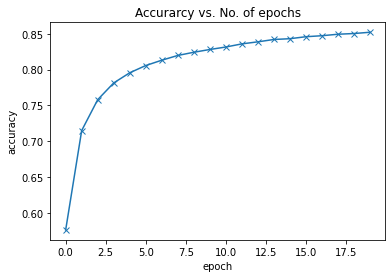

In [64]:
history = history1 + history2 + history3 + history4
accuracies = [result['val_accs'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accurarcy vs. No. of epochs');

In [74]:
test_dataset = MNIST(root='data/', train=False, transform=transforms.ToTensor())

Shape:  torch.Size([1, 28, 28])
Label:  7


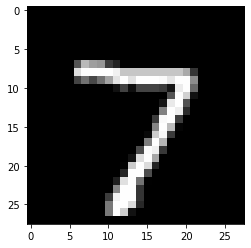

In [75]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape: ', img.shape)
print('Label: ', label)

In [76]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label:  3 , Predicted:  3


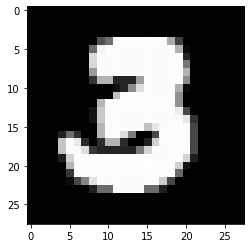

In [89]:
img, label = test_dataset[200]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

Label:  0 , Predicted:  0


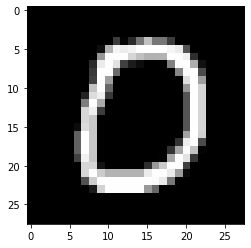

In [82]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

In [88]:
success = 0
failure = 0

for img, label in test_dataset:
    if(label == predict_image(img, model)):
        success += 1
    else:
        failure += 1

print("Successes: ", success)
print("Failures: ", failure)

Successes:  8633
Failures:  1367


Label:  5 , Predicted:  2


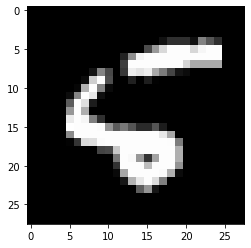

In [87]:
img, label = test_dataset[8]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

Label:  3 , Predicted:  8


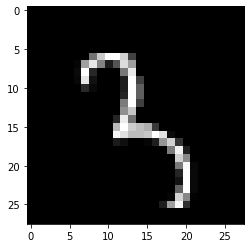

In [91]:
img, label = test_dataset[195]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

In [93]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_accs': 0.860644519329071, 'val_loss': 0.6418551802635193}

In [98]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [99]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0089,  0.0013,  0.0227,  ...,  0.0207,  0.0151,  0.0115],
                      [-0.0101,  0.0239,  0.0307,  ..., -0.0129,  0.0283,  0.0075],
                      [ 0.0334, -0.0170,  0.0104,  ..., -0.0297,  0.0087, -0.0035],
                      ...,
                      [ 0.0232, -0.0007, -0.0196,  ..., -0.0345, -0.0161,  0.0249],
                      [-0.0322,  0.0083,  0.0018,  ..., -0.0277, -0.0264,  0.0070],
                      [ 0.0070, -0.0146,  0.0019,  ...,  0.0031, -0.0129,  0.0264]])),
             ('linear.bias',
              tensor([-0.0424,  0.1202, -0.0434, -0.0335,  0.0196,  0.0375, -0.0293,  0.0695,
                      -0.0716, -0.0211]))])

In [100]:
model2 = MnistModule()

In [101]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0089,  0.0013,  0.0227,  ...,  0.0207,  0.0151,  0.0115],
                      [-0.0101,  0.0239,  0.0307,  ..., -0.0129,  0.0283,  0.0075],
                      [ 0.0334, -0.0170,  0.0104,  ..., -0.0297,  0.0087, -0.0035],
                      ...,
                      [ 0.0232, -0.0007, -0.0196,  ..., -0.0345, -0.0161,  0.0249],
                      [-0.0322,  0.0083,  0.0018,  ..., -0.0277, -0.0264,  0.0070],
                      [ 0.0070, -0.0146,  0.0019,  ...,  0.0031, -0.0129,  0.0264]])),
             ('linear.bias',
              tensor([-0.0424,  0.1202, -0.0434, -0.0335,  0.0196,  0.0375, -0.0293,  0.0695,
                      -0.0716, -0.0211]))])

In [102]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_accs': 0.860644519329071, 'val_loss': 0.6418551802635193}